# Teste preliminar do Sfari dataset

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
sfari= pd.read_csv("SFARI-Gene_genes_07-17-2023release_09-28-2023export.csv")
sfari

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,7
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,2
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,10
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,5
4,9,ABCE1,ATP binding cassette subfamily E member 1,ENSG00000164163,4,Rare Single Gene Mutation,1.0,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...
1135,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4
1136,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16
1137,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,3
1138,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,6


### Null values

In [49]:
print(sfari.isnull().sum())

status                 0
gene-symbol            0
gene-name              1
ensembl-id             9
chromosome             0
genetic-category       1
gene-score            94
syndromic              0
eagle                982
number-of-reports      0
dtype: int64


### Null values and sydromic

In [50]:
filtered_sfari = sfari[(pd.isna(sfari['gene-score'])) & (sfari['syndromic'] == 1)]
count = len(filtered_sfari)

print("Number of rows with no gene-score and 'syndromic':", count)

Number of rows with no gene-score and 'syndromic': 94


### Duplicates

In [51]:
#find duplicates
duplicate_rows_data = sfari[sfari.duplicated()]
duplicate_rows_data
#there are none

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports


### Some basic data statistics

In [52]:
sfari.describe()

,status,gene-score,syndromic,eagle,number-of-reports
count,1140.0,1046.000000,1140.000000,158.000000,1140.000000
mean,9.0,1.885277,0.251754,14.655696,10.720175
std,0.0,0.562150,0.434211,20.682553,13.663128
min,9.0,1.000000,0.000000,0.000000,1.000000
25%,9.0,2.000000,0.000000,3.312500,4.000000
50%,9.0,2.000000,0.000000,8.600000,6.000000
75%,9.0,2.000000,1.000000,17.175000,11.000000
max,9.0,3.000000,1.000000,143.750000,135.000000


## Cheking null values 

### ensembl-id

first let's check the genes that don't have the ensemble id

In [53]:
sfari.loc[pd.isna(sfari['ensembl-id'])]

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
12,9,ADA,adenosine deaminase,NaN,20,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,8
67,9,AR,androgen receptor,NaN,X,Genetic Association,2.0,0,NaN,6
589,9,MAPT-AS1,MAPT antisense RNA 1,NaN,17,Genetic Association,2.0,0,NaN,1
594,9,MET,met proto-oncogene (hepatocyte growth factor r...,NaN,7,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,40
599,9,MIR137,microRNA 137,NaN,1,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,10
611,9,MSNP1AS,"Moesinpseudogene 1, antisense",NaN,5,"Genetic Association, Functional",2.0,0,NaN,13
810,9,PTCHD1-AS,PTCHD1antisense RNA (head to head),NaN,X,Rare Single Gene Mutation,2.0,0,17.6,3
861,9,RP11-1407O15.2,NaN,NaN,17,Rare Single Gene Mutation,2.0,0,NaN,1
883,9,RPS10P2-AS1,ribosomal protein S10 pseudogene 2 anti-sense 1,NaN,20,"Genetic Association, Functional",2.0,0,NaN,4


### Gene score

there are a total of 94 values with no gene-score

In [54]:
sfari.loc[pd.isna(sfari['gene-score']) & (sfari['syndromic'] == 1)]

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
9,9,ACTL6B,actin like 6B,ENSG00000077080,7,"Rare Single Gene Mutation, Syndromic, Functional",NaN,1,NaN,14
11,9,ACY1,aminoacylase 1,ENSG00000243989,3,"Rare Single Gene Mutation, Syndromic",NaN,1,NaN,10
33,9,AHI1,Abelson helper integration site 1,ENSG00000135541,6,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,20
36,9,ALDH1A3,aldehyde dehydrogenase 1 family member A3,ENSG00000184254,15,"Rare Single Gene Mutation, Syndromic",NaN,1,NaN,7
39,9,ALG6,"ALG6, alpha-1,3-glucosyltransferase",ENSG00000088035,1,"Rare Single Gene Mutation, Syndromic",NaN,1,NaN,2
...,...,...,...,...,...,...,...,...,...,...
1103,9,XPC,"xeroderma pigmentosum, complementation group C",ENSG00000154767,3,"Rare Single Gene Mutation, Syndromic",NaN,1,NaN,12
1113,9,ZBTB18,zinc finger and BTB domain containing 18,ENSG00000179456,1,"Rare Single Gene Mutation, Syndromic",NaN,1,NaN,11
1116,9,ZBTB7A,zinc finger and BTB domain containing 7A,ENSG00000178951,19,"Rare Single Gene Mutation, Syndromic",NaN,1,NaN,2
1122,9,ZMYM3,zinc finger MYM-type containing 3,ENSG00000147130,X,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,8


Has you can see all the values that don't have a genes-socore are all syndromic.

## Graphs

## Gene scores

In [55]:
def plot_counts(column, dataframe):
    value_counts = dataframe[column].value_counts().sort_index()  # Sort the index to preserve the original order

    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")

    ax = sns.barplot(x=value_counts.index, y=value_counts.values,hue=value_counts.index, palette=sns.color_palette("Blues", 3))
    plt.title(f'Number of different {column} present')
    plt.xlabel(column)
    plt.ylabel('Count')

    for i, v in enumerate(value_counts):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

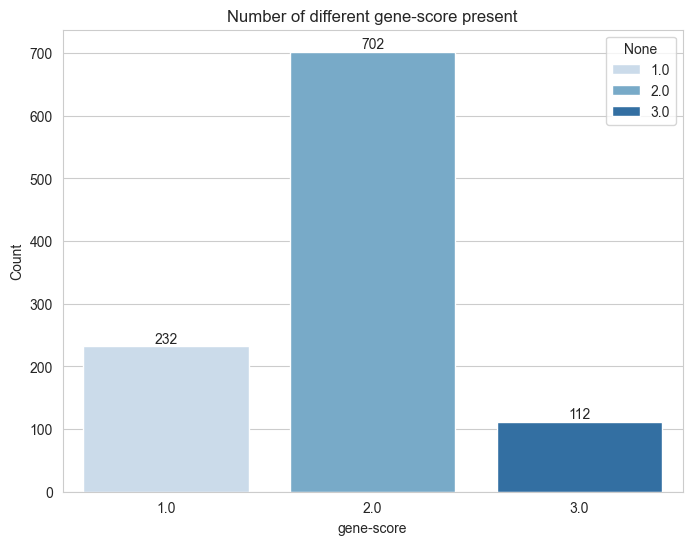

In [56]:
plot_counts("gene-score",sfari)

## Chromosomes

C:\Users\joaop\AppData\Local\Temp\ipykernel_10600\454378160.py:7: UserWarning: 
The palette list has fewer values (3) than needed (25) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=value_counts.index, y=value_counts.values,hue=value_counts.index, palette=sns.color_palette("Blues", 3))


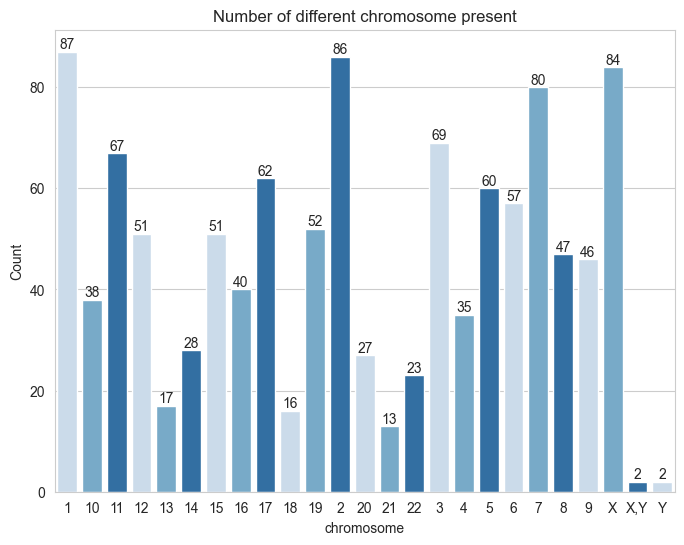

In [57]:
plot_counts('chromosome',sfari)

As you can see  there are a few chromosomes that jump into view the 1,2 and X!

### This shows all of the genes, but what about genes with different gene scores, will they also appear in the same chromosomes?

In [58]:
subset1= sfari[sfari["gene-score"]==1]
subset2= sfari[sfari["gene-score"]==2]
subset3= sfari[sfari["gene-score"]==3]

## Gene-score = 1

C:\Users\joaop\AppData\Local\Temp\ipykernel_10600\454378160.py:7: UserWarning: 
The palette list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=value_counts.index, y=value_counts.values,hue=value_counts.index, palette=sns.color_palette("Blues", 3))


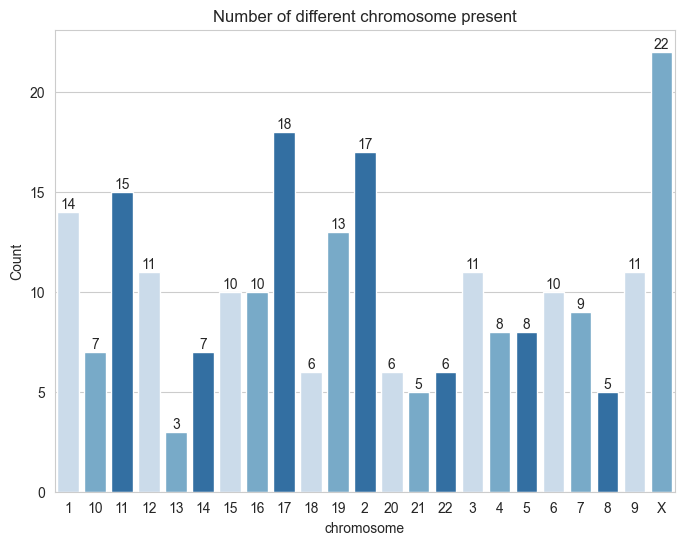

In [59]:
plot_counts('chromosome',subset1)

## Gene-score = 2

C:\Users\joaop\AppData\Local\Temp\ipykernel_10600\454378160.py:7: UserWarning: 
The palette list has fewer values (3) than needed (25) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=value_counts.index, y=value_counts.values,hue=value_counts.index, palette=sns.color_palette("Blues", 3))


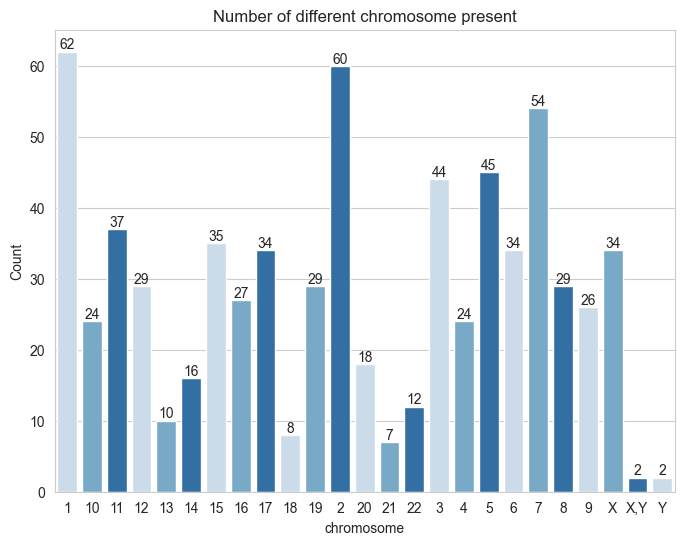

In [60]:
plot_counts('chromosome',subset2)

## Gene-score = 3


C:\Users\joaop\AppData\Local\Temp\ipykernel_10600\454378160.py:7: UserWarning: 
The palette list has fewer values (3) than needed (22) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=value_counts.index, y=value_counts.values,hue=value_counts.index, palette=sns.color_palette("Blues", 3))


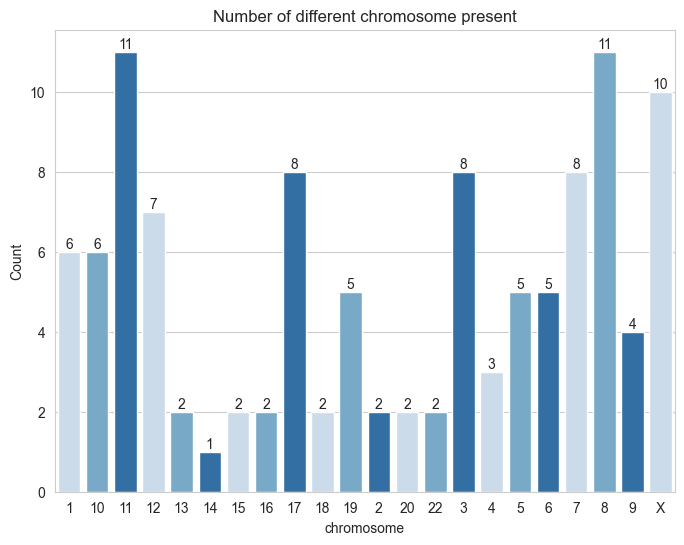

In [61]:
plot_counts('chromosome',subset3)

# Data transformation

## Ensembl numbers

In order to fill in the missing Emsemble I will manually check each missing value and compare the chromosomes and the full name of the gene, this might not be the best approach but it will do for now

In [62]:
sfari.loc[pd.isna(sfari['ensembl-id'])]

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
12,9,ADA,adenosine deaminase,NaN,20,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,8
67,9,AR,androgen receptor,NaN,X,Genetic Association,2.0,0,NaN,6
589,9,MAPT-AS1,MAPT antisense RNA 1,NaN,17,Genetic Association,2.0,0,NaN,1
594,9,MET,met proto-oncogene (hepatocyte growth factor r...,NaN,7,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,40
599,9,MIR137,microRNA 137,NaN,1,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,0,NaN,10
611,9,MSNP1AS,"Moesinpseudogene 1, antisense",NaN,5,"Genetic Association, Functional",2.0,0,NaN,13
810,9,PTCHD1-AS,PTCHD1antisense RNA (head to head),NaN,X,Rare Single Gene Mutation,2.0,0,17.6,3
861,9,RP11-1407O15.2,NaN,NaN,17,Rare Single Gene Mutation,2.0,0,NaN,1
883,9,RPS10P2-AS1,ribosomal protein S10 pseudogene 2 anti-sense 1,NaN,20,"Genetic Association, Functional",2.0,0,NaN,4


In [63]:
sfari.loc[12, 'ensembl-id'] = "ENSG00000196839"
sfari.loc[67, 'ensembl-id']="ENSG00000169083"
sfari.loc[589, 'ensembl-id']="ENSG00000264589"
sfari.loc[594, 'ensembl-id']="ENSG00000105976"
sfari.loc[599, 'ensembl-id']="ENSG00000284202"
sfari.loc[611, 'ensembl-id']="ENSG00000233067"
sfari.loc[810, 'ensembl-id']="ENSG00000165186"
sfari.loc[861, 'ensembl-id']="ENSG00000174093"
sfari.loc[861, 'gene-name']="RP11-1407O15.2"

sfari= sfari.drop(883, axis=0).reset_index(drop=True)

After cheking with the Sfari data base most of these genes were 
####  non-coding RNA  

# Important !!!

Due to the nature of this issue I will have to drop genes that have a gene score of 3, since they will not make good ASD positive genes.

In [64]:

sfari = sfari[sfari['gene-score'] != 3].reset_index(drop=True)
print(sfari.isnull().sum())

status                 0
gene-symbol            0
gene-name              0
ensembl-id             0
chromosome             0
genetic-category       1
gene-score            94
syndromic              0
eagle                869
number-of-reports      0
dtype: int64


In [65]:
sfari

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,7
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,2
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,10
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,5
4,9,ABCE1,ATP binding cassette subfamily E member 1,ENSG00000164163,4,Rare Single Gene Mutation,1.0,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...
1022,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,4
1023,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,16
1024,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,3
1025,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,6


In [66]:
sfari.loc[ (sfari['ensembl-id'] == "ENSG00000001497")]

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports


In [67]:
sfari.to_csv("sfari_ed.csv",index=False)